# Variational Auto-Encoder

Variational Auto-Encoders let us design complex generative models of data. They were created in 2013 by Kingma et al. and Rezende et al..

Fictional celebrity faces generated by a variational auto-encoder:

<img src="figures/variational-autoencoder-faces.jpg" />

## Generative models

> Any model that takes a training set, consisting of samples drawn from a distribution $p_{data}$ (or $p_x$), and learns to represent an estimate of that distribution somehow

> *Ian Goodfellow*

## Two perspectives on VAEs
- neural networks
- probability models

## The neural networks perspective

<img src="figures/vae.png" />

In neural net language, a variational autoencoder consists of an encoder and a decoder.
- Encoder takes a datapoint x and outputs a hidden representation z. It is denoted by $q_\theta(z|x)$.
- Decoder takes the representation $z$ and outputs the parameters to the probability distribution of the data.  It is denoted by $p_\phi(x|z)$.

Loss function of the variational autoencoder for a single datapoint $l_i$ is the negative log-likelihood with a regularizer. The total loss is then $\sum_{i=1}^Nl_i$ for $N$ total datapoints.
<img src="figures/loss.png" />

The regularizer term is the Kullback-Leibler divergence between the encoder’s distribution and $p(z)$. $p(z)$ is usually specified as the centered isotropic multivariate Gaussian. $$p(z) = N(0,1)$$ 

If the encoder outputs representations z that are different than those from a standard normal distribution, it will receive a penalty in the loss.

<img src="figures/regularizer.png" />

### Note : Kullback-Leibler divergence

Definition:
$$KL(P||Q) = E_P[log{\frac{P}{Q}}] = E_P[logP - logQ] = \sum_iP(i)log\frac{P(i)}{Q(i)}$$

KL divergence measures the information lost when using Q to approximate P. In other words, it measures how close Q is to P.

## The probability model perspective

In the probability model framework, we assume there are latent variables $z$ that generate data $x$. A variational autoencoder contains a specific probability model of data $x$ and latent variables $z$. The joint probability of the model is 

$$p(x,z) = p(x|z)p(z)$$

- $x$: data we want to model
- $z$: latent variables
- $p(x)$: probability distribution of the data $x$
- $p(z)$: probability distribution of the latent variables $z$
- $p(x|z)$: conditional probability distribution of the data given latent variables

### Generative process

For each datapoint $i$:

- Draw latent variables $z_i$ ~ $p(z)$
- Draw datapoint $x_i$ ~ $p(x|z)$

### Graphical model

<img src="figures/graphical-model-variational-autoencoder.png" />

The latent variables are drawn from a prior $p(z)$. The data are drawn from the likelihood $p(x|z)$. The shaded node from x denotes observed data.

### Note : Bayes' rule

<img src="figures/bayes.png" />

### Inference of latent variables

The goal is to infer good values of the latent variables given observed data, or to calculate the posterior $p(z|x)$.

By bayes' rule:
$$p(z|x) = \frac{p(x|z)p(z)}{p(x)}$$

### The intractability of $p(x)$

Marginalizing out the latent variables is intractable. It requires exponential time to compute as it needs to be evaluated over all configurations of latent variables.

$$p(x) = \int{p(x, z)dz} = \int{p(x|z)p(z)dz}$$

We therefore need to approximate this posterior distribution.

### Variational inference
Variational inference means general family of methods for approximating complicated densities by a simpler class of densities

We approximate the posterior $p(z|x)$ with a family of distributions

$$q_\lambda(z|x)$$

- $\lambda$ : variational parameter. It indexes the family of distributions. If $q$ were Gaussian, then $\lambda_x = (\mu(x), \Sigma(x))$

### How well our variational posterior $q(z|x)$ approximates the true posterior $p(z|x)$?

KL divergence

$$KL(q_\lambda(z|x)||p(z|x))$$

The optimal approximate posterior is

$$q^*_\lambda(z|x) = argmin_\lambda KL(q_\lambda(z|x) || p(z|x))$$

### Calculation of KL divergence

$$KL(q_\lambda(z|x)||p(z|x))$$

$$= E_{q_\lambda}[log{q_\lambda(z|x)} - log{p(z|x)}]$$

$$= E_{q_\lambda}[log{q_\lambda(z|x)} - log{\frac{p(x,z)}{p(x)}}]$$

$$= E_{q_\lambda}[log{q_\lambda(z|x)} - log{p(x,z)} + log{p(x)}]$$

$$= E_{q_\lambda}[log{q_\lambda(z|x)} - log{p(x,z)}] + log{p(x)}$$

$$= E_{q_\lambda}[log{q_\lambda(z|x)}] - E_{q_\lambda}[log{p(x,z)}] + log{p(x)}$$

$\log p(x)$ doesn’t depend on z, so move out the expectation

Rewrite the equation for $p(x)$:

$$log{p(x)} = E_{q_\lambda}[log{p(x,z)}] - E_{q_\lambda}[log{q_\lambda(z|x)}] + KL(q_\lambda(z|x)||p(z|x))$$

Again, evidence p(x) is intractable

### ELBO (Evidence Low BOund)

Consider the following function

$$ELBO(\lambda)=E{q_\lambda} [logp(x,z)]−E{q_\lambda} [logq_\lambda(z|x)]$$

Rewrite the equation for the evidence $p(x)$

$$log p(x) = ELBO(\lambda) + KL(q_\lambda(z|x)||p(z|x))$$

By Jensen’s inequality, the Kullback-Leibler divergence is always greater than or equal to zero. Thus, ELBO is the low bound of the evidence $p(x)$, as the name implies.

$$log p(x) \geq ELBO(\lambda)$$

Minimizing KL divergence is equivalent maximizing ELBO

### Calculation of ELBO

$$ELBO(\lambda)$$

$$=E_{q_\lambda} [\log p(x,z)]−E_{q_\lambda} [\log q_\lambda(z|x)]$$

$$=E_{q_\lambda}[\log p(x,z) - \log q_\lambda(z|x)]$$

$$=E_{q_\lambda}[\log p(x|z)p(z) - \log q_\lambda(z|x)]$$

$$=E_{q_\lambda}[\log p(x|z) + \log p(z) - \log q_\lambda(z|x)]$$

$$=E_{q_\lambda}[\log p(x|z) - (\log q_\lambda(z|x) - \log p(z))]$$

$$=E_{q_\lambda}[\log p(x|z)] - KL(q_\lambda(z|x)||p(z))$$

ELBO for a single datapoint:

$$ELBO_i(\lambda)=E_{q_\lambda(z|x_i)}[\log p(x_i|z)] - KL(q_\lambda(z|x_i)||p(z))$$

### Connection to neural networks

- Parametrize the approximate posterior $q_\theta(z|x,\lambda)$ with an inference network (or encoder) that takes as input data $x$ and outputs parameters $\lambda$.

- Parametrize the likelihood $p(x|z)$ with a generative network (or decoder) that takes latent variables $z$ and outputs parameters to the data distribution $p_\phi(x|z)$.

Then,

$$ELBO_i(\theta, \phi)=E_{q_\theta(z|x_i)}[\log p_\phi(x_i|z)] - KL(q_\theta(z|x_i)||p(z))$$

Therefore,

$$ELBO_i(\theta, \phi) = -l_i(\theta, \phi)$$

Maximizing ELBO is equivalent to minimizing loss.

### Calculation of $KL(N (\mu(x), \Sigma(x)) || N(0, 1))$

We assume $q_\theta(z|x)$ is normal distributed. Thus, $KL(q_\theta(z|x_i)||p(z))$ is calculating KL divergence between two normal distributions. We can simplify the calculating using math.

The formula for calculating KL divergence between two normal distributions:

<img src="figures/KL1.png" />

Our case:
<img src="figures/KL2.png" />

Simplifying the equation:
<img src="figures/KL3.png" />

### Reparameterization trick

It is impossible to backpropagate through sampling from a distribution. Instead, we reparametrize samples so that the randomness is independent of the parameters.

Instead of $$ z \sim Normal(\mu(x), \Sigma(x)),$$

use $$z = \mu + \sigma*\epsilon$$
where $$ \epsilon \sim Normal(0,1)$$

<img src="figures/reparameterization.png" />

# Implementation

## Define variables

In [1]:
import tensorflow as tf

In [2]:
batch_size = 100
h_size = 128
z_size = 100

In [3]:
layers = {} # to save tensors

In [4]:
inputs = tf.placeholder('float', [batch_size, 28*28])

## Encoder

In [5]:
def encoder(inputs):
    layers['encoder'] = {}
    with tf.variable_scope('encoder'):
        layers['encoder']['hidden_layer1'] = tf.contrib.layers.fully_connected(inputs=inputs,
                                      num_outputs=h_size,
                                      scope='fc1')

        layers['encoder']['hidden_layer2'] = tf.contrib.layers.fully_connected(inputs=layers['encoder']['hidden_layer1'],
                                      num_outputs=h_size,
                                      scope='fc2')

        layers['encoder']['z_mu'] = tf.contrib.layers.fully_connected(inputs=layers['encoder']['hidden_layer2'],
                                     num_outputs=z_size,
                                     activation_fn=None,
                                     scope='z_mu')
        layers['encoder']['z_log_sigma'] = tf.contrib.layers.fully_connected(inputs=layers['encoder']['hidden_layer2'],
                                     num_outputs=z_size,
                                     activation_fn=None,
                                     scope='z_log_sigma')
        
        return layers['encoder']['z_mu'], layers['encoder']['z_log_sigma']

- Encoder : two fully connected hidden layers
- Inputs : datapoint $x$
- Outputs : $\mu$ and $\log \Sigma$

## Sampling $z$

In [6]:
def sampling_z(z_mu, z_log_sigma):
    with tf.variable_scope('sampling_z'):
        epsilon = tf.random_normal(shape=[batch_size, z_size])
        layers['z_samples'] = z_mu + tf.exp(z_log_sigma / 2) * epsilon
        
        return layers['z_samples']

- Use reparameteterization trick
- $z =\mu(x)+\Sigma^{\frac{1}{2}}(x)\epsilon=\mu(x)+(\exp(\log\Sigma(x)))^{\frac{1}{2}}\epsilon $

## Decoder

In [9]:
def decoder(z_samples, reuse=False):
    layers['decoder'] = {}
    with tf.variable_scope('decoder') as scope:
        if reuse: scope.reuse_variables()
            
        layers['decoder']['hidden_layer1'] = tf.contrib.layers.fully_connected(inputs=z_samples,
                                      num_outputs=h_size,
                                      scope='fc1')

        layers['decoder']['hidden_layer2'] = tf.contrib.layers.fully_connected(inputs=layers['decoder']['hidden_layer1'],
                                      num_outputs=h_size,
                                      scope='fc2')
        
        layers['decoder']['logits'] = tf.contrib.layers.fully_connected(inputs=layers['decoder']['hidden_layer2'],
                                     num_outputs=28*28,
                                     activation_fn=None,
                                     scope='logits')
        layers['decoder']['probs'] = tf.nn.sigmoid(layers['decoder']['logits'])
        
        return layers['decoder']['logits'], layers['decoder']['probs']

- Decoder : two fully connected hidden layers just like encoder
- Inputs : samples of $z$
- Outputs : logits and sigmoids with the same size as $x$ 

## Building the model

In [10]:
z_mu, z_log_sigma = encoder(inputs)

z_samples = sampling_z(z_mu, z_log_sigma)

logits, probs = decoder(z_samples)

## Loss

In [11]:
with tf.variable_scope('loss'):
    reconstruction_loss = tf.reduce_sum(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=inputs),
        axis=1)

    KL_divergence_loss = 1/2 * tf.reduce_sum(
        tf.exp(z_log_sigma) + z_mu**2 - 1 - z_log_sigma,
        axis=1)

    loss = tf.reduce_mean(reconstruction_loss + KL_divergence_loss)

Reconstruction Loss


Regularizer (KL divergence)
<img src="figures/KL3.png" />

## Training

In [12]:
learning_rate = 0.001
trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [13]:
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("data/", one_hot=True, reshape=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [14]:
# number of batches
num_batch = int(mnist.train.num_examples/batch_size)
num_batch

550

In [21]:
# for saving & printing
save_epoch = 10
print_epoch = 1

import os
medium_path = 'medium'
checkpoint_path = os.path.join(medium_path, 'model.ckpt')
saver = tf.train.Saver(tf.global_variables(), max_to_keep=1000)

In [22]:
sess = tf.InteractiveSession()

In [23]:
init = tf.global_variables_initializer()
init.run()
epoch = 0

In [24]:
# initial loss
example_X, example_ys = mnist.train.next_batch(batch_size)
loss.eval(feed_dict={inputs:example_X})

552.76666

In [25]:
# number of times to iterate over training data
training_epochs = 100

In [26]:
from tqdm import tqdm_notebook

In [27]:
for _ in tqdm_notebook(range(training_epochs)):
    avg_cost = 0
    for _ in range(num_batch):
        train_X, train_ys = mnist.train.next_batch(batch_size)
        trainer.run(feed_dict={inputs:train_X})
        avg_cost += loss.eval(feed_dict={inputs:train_X}) / num_batch

    if epoch % print_epoch == 0:
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost), flush=True)
        
    if epoch % save_epoch == 0:
        print('Save!')
        saver.save(sess, checkpoint_path, global_step=epoch)
    
    epoch += 1

Epoch: 0001 cost= 234.327676974
Save!
Epoch: 0002 cost= 201.547607866
Epoch: 0003 cost= 197.032962979
Epoch: 0004 cost= 194.172130404
Epoch: 0005 cost= 188.571381725
Epoch: 0006 cost= 184.216074968
Epoch: 0007 cost= 180.746351346
Epoch: 0008 cost= 175.882564281
Epoch: 0009 cost= 170.595853937
Epoch: 0010 cost= 166.667039296
Epoch: 0011 cost= 163.579252208
Save!
Epoch: 0012 cost= 160.835382857
Epoch: 0013 cost= 158.309407931
Epoch: 0014 cost= 156.031342496
Epoch: 0015 cost= 153.748473095
Epoch: 0016 cost= 151.744040999
Epoch: 0017 cost= 149.890301098
Epoch: 0018 cost= 148.195892473
Epoch: 0019 cost= 146.476445451
Epoch: 0020 cost= 144.931470698
Epoch: 0021 cost= 143.356183916
Save!
Epoch: 0022 cost= 141.926802507
Epoch: 0023 cost= 140.578767256
Epoch: 0024 cost= 139.275967241
Epoch: 0025 cost= 138.159280271
Epoch: 0026 cost= 136.942153501
Epoch: 0027 cost= 136.017418768
Epoch: 0028 cost= 134.975320809
Epoch: 0029 cost= 134.111824452
Epoch: 0030 cost= 133.250486270
Epoch: 0031 cost= 132.

## Generating images

In [42]:
import numpy as np
generated_z = np.random.normal(size=(10**2, z_size)).astype(np.float32)

In [43]:
%matplotlib inline
from matplotlib import pyplot as plt

In [44]:
def square_plot(data):
    """Take an array of shape (n, height, width) or (n, height, width , 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""

    if type(data) == list:
        data = np.concatenate(data)
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())

    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))

    padding = (((0, n ** 2 - data.shape[0]) ,
                (0, 1), (0, 1))  # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data , padding, mode='constant' , constant_values=1)  # pad with ones (white)

    # tilethe filters into an image
    data = data.reshape((n , n) + data.shape[1:]).transpose((0 , 2 , 1 , 3) + tuple(range(4 , data.ndim + 1)))

    data = data.reshape((n * data.shape[1] , n * data.shape[3]) + data.shape[4:])

    fig = plt.figure(figsize=(17, 17))
    plt.imshow(data[:,:,0], cmap='gray')
    plt.axis('off')
    plt.close();
    
    return fig

In [45]:
checkpoint_filenames = [filename.split(".data")[0] for filename in os.listdir(medium_path) 
                        if filename.endswith('.data-00000-of-00001')]

for checkpoint_filename in sorted(checkpoint_filenames, key=lambda x: int(x.split('ckpt-')[1])):

    saver.restore(sess, os.path.join(medium_path, checkpoint_filename))
    _, probs = decoder(generated_z, reuse=True)
    generated_images = probs.eval().reshape([100, 28, 28, 1])
    fig = square_plot(generated_images)
    fig.savefig('generated_images/{}.png'.format(checkpoint_filename))

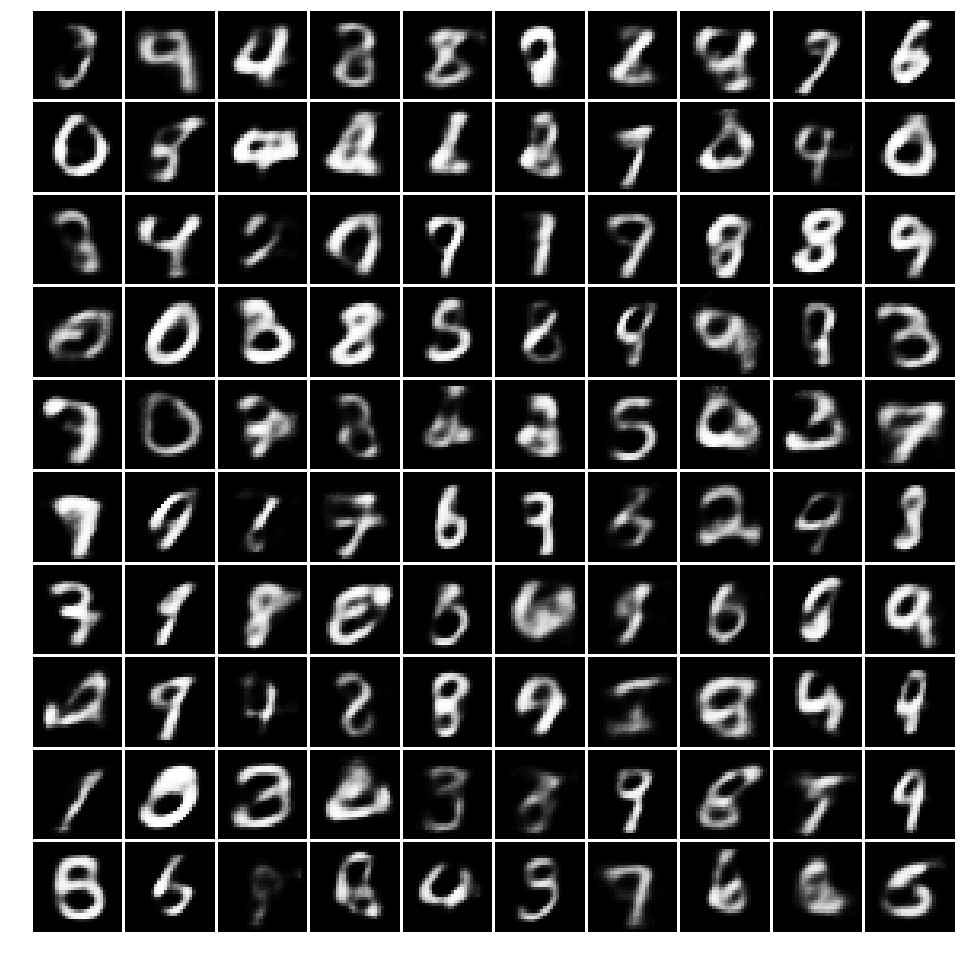

In [46]:
fig

# References
- Diederik P. Kingma, Max Welling. Auto-Encoding Variational Bayes. arXiv: 1312.6114
- Carl Doersch. Tutorial on Variational Autoencoders. arXiv: 1606.05908
- Blog. Tutorial - What is a variational autoencoder? https://jaan.io/what-is-variational-autoencoder-vae-tutorial/
- Blog. Variational Autoencoder: Intuition and Implementation. http://wiseodd.github.io/techblog/2016/12/10/variational-autoencoder/
- Ilgu Yi. Tutorial pdf. http://www.modulabs.co.kr/DeepLAB_library/13347. Implementation. https://github.com/ilguyi/vae.tensorflow.slim

# Further readings

## Generating high resolution Images

http://blog.otoro.net/2016/04/01/generating-large-images-from-latent-vectors/

<img src="figures/output_sinusoid.gif" />

## Exploring latent space

https://jmetzen.github.io/2015-11-27/vae.html

<img src="figures/latent_space.png" />

## Character portrait

https://www.slideshare.net/HwanheeKim2/ndc2017-vae-75419284

<img src="figures/analogy.png" />

## Attribute2Image: Conditional Image Generation from Visual Attributes

https://arxiv.org/abs/1512.00570

<img src="figures/attribute-conditioned.png" />